In [111]:
import re
import string
import pandas as pd
import numpy as np
import pickle
import pprint

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from utils import *
import random

#Classifiers 
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC

# Time and counters
from time import perf_counter

#metrics
from sklearn.metrics import f1_score , recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, classification_report

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#NLTK
import nltk
from nltk import flatten , FreqDist
from collections import Counter
from nltk.corpus import wordnet   #Import wordnet from the NLTK
# nltk.download()

# Comparison of Models

In [28]:
Classifiers = pd.read_csv("comparison/Metrics_Comparison.csv")
Classifiers = Classifiers.loc[:, ~Classifiers.columns.str.contains('^Unnamed')]
Classifiers.to_csv("comparison/Metrics_Comparison.csv", index=False)
DNN_Glove = pd.read_csv("comparison/DNN_glove_comparison.csv")
DNN_Glove = DNN_Glove.loc[:, ~DNN_Glove.columns.str.contains('^Unnamed')]
DNN_Glove.to_csv("comparison/DNN_glove_comparison.csv", index=False)
DNN = pd.read_csv("comparison/DNN_Trainable_Embeddings_comparison.csv")
DNN = DNN.loc[:, ~DNN.columns.str.contains('^Unnamed')]
DNN.to_csv("comparison/DNN_Trainable_Embeddings_comparison.csv", index=False)

DNN_Glove_2 = pd.read_csv("comparison/DNN_glove_2_comparison.csv")
DNN_Glove_2 = DNN_Glove_2.loc[:, ~DNN_Glove_2.columns.str.contains('^Unnamed')]
DNN_Glove_2.to_csv("comparison/DNN_glove_2_comparison.csv", index=False)

In [29]:
Classifiers

,Model,Precision,Recall,f1 score,Accuracy,ROC-AUC,Training time (sec)
0,XGBoost,0.984398,0.989835,0.987075,0.989991,0.989835,18.89
1,SVM (Linear),0.986752,0.980057,0.983343,0.987261,0.980057,0.10
2,SVM (RBF),0.987905,0.978924,0.983305,0.987261,0.978924,15.33
3,Logistic Regr.,0.986108,0.964420,0.974630,0.980892,0.964420,2.16
4,Random Forest,0.981635,0.945804,0.961995,0.971793,0.945804,7.06
5,Gradient Boosting,0.972522,0.944477,0.957408,0.968153,0.944477,24.77
6,Decision Tree,0.960225,0.941921,0.950586,0.962693,0.941921,2.92
7,KNN,0.968443,0.927610,0.945718,0.959964,0.927610,0.03
8,MultinomialNB,0.935225,0.788462,0.831223,0.889900,0.788462,0.02


In [30]:
DNN

,Model,Precision,Recall,f1 score,Accuracy,Error,Loss,ROC-AUC
0,Cnn with word embeddings,0.988799,0.989353,0.989911,0.991811,0.818926,0.046117,0.988799
1,Ann with word embeddings,0.987472,0.984725,0.982061,0.988171,1.182896,0.030170,0.987472
2,Rnn with word embeddings,0.970183,0.977209,0.984820,0.982712,1.728845,0.083168,0.970183


In [31]:
DNN_Glove

,Model,Precision,Recall,f1 score,Accuracy,Error,Loss,ROC-AUC
0,Rnn with GLOVE embeddings,0.861729,0.882229,0.910450,0.914468,8.553231,0.223910,0.861729
1,Ann with GLOVE embeddings,0.910071,0.886088,0.869484,0.907188,9.281164,0.234421,0.910071
2,Cnn with GLOVE embeddings,0.832914,0.864220,0.917684,0.905369,9.463149,0.212180,0.832914


In [32]:
DNN_Glove_2

,Model,Precision,Recall,f1 score,Accuracy,Error,Loss,ROC-AUC
0,Cnn with GLOVE embeddings architecture 2,0.971544,0.969416,0.967339,0.976342,2.365786,0.271382,0.971544
1,Rnn with GLOVE embeddings architecture 2,0.852532,0.888220,0.950662,0.922657,7.734305,0.322624,0.852532
2,Ann with GLOVE embeddings architecture 2,0.730672,0.771247,0.909531,0.858053,14.194721,0.350729,0.730672


In [33]:
Merged = [DNN , DNN_Glove, DNN_Glove_2]
Merged = pd.concat(Merged)
Merged

,Model,Precision,Recall,f1 score,Accuracy,Error,Loss,ROC-AUC
0,Cnn with word embeddings,0.988799,0.989353,0.989911,0.991811,0.818926,0.046117,0.988799
1,Ann with word embeddings,0.987472,0.984725,0.982061,0.988171,1.182896,0.030170,0.987472
2,Rnn with word embeddings,0.970183,0.977209,0.984820,0.982712,1.728845,0.083168,0.970183
0,Rnn with GLOVE embeddings,0.861729,0.882229,0.910450,0.914468,8.553231,0.223910,0.861729
1,Ann with GLOVE embeddings,0.910071,0.886088,0.869484,0.907188,9.281164,0.234421,0.910071
2,Cnn with GLOVE embeddings,0.832914,0.864220,0.917684,0.905369,9.463149,0.212180,0.832914
0,Cnn with GLOVE embeddings architecture 2,0.971544,0.969416,0.967339,0.976342,2.365786,0.271382,0.971544
1,Rnn with GLOVE embeddings architecture 2,0.852532,0.888220,0.950662,0.922657,7.734305,0.322624,0.852532
2,Ann with GLOVE embeddings architecture 2,0.730672,0.771247,0.909531,0.858053,14.194721,0.350729,0.730672


In [34]:
#dropping Columns 
Merged_drop = Merged.drop(columns=["Error", "Loss"], axis=1).copy()
Classifiers_drop = Classifiers.drop(columns=["Training time (sec)"],axis=1).copy()

In [35]:
Full_comparison = [Classifiers_drop , Merged_drop]
Full_comparison = pd.concat(Full_comparison).sort_values(by=['Accuracy'],ascending=False)
Full_comparison.to_csv('comparison/All_models_and_classifiers.csv', index=False)

In [36]:
All_comparison = pd.read_csv("comparison/All_models_and_classifiers.csv")
# All_comparison = All_comparison.loc[:, ~All_comparison.columns.str.contains('^Unnamed')]
All_comparison

,Model,Precision,Recall,f1 score,Accuracy,ROC-AUC
0,Cnn with word embeddings,0.988799,0.989353,0.989911,0.991811,0.988799
1,XGBoost,0.984398,0.989835,0.987075,0.989991,0.989835
2,Ann with word embeddings,0.987472,0.984725,0.982061,0.988171,0.987472
3,SVM (RBF),0.987905,0.978924,0.983305,0.987261,0.978924
4,SVM (Linear),0.986752,0.980057,0.983343,0.987261,0.980057
5,Rnn with word embeddings,0.970183,0.977209,0.984820,0.982712,0.970183
6,Logistic Regr.,0.986108,0.964420,0.974630,0.980892,0.964420
7,Cnn with GLOVE embeddings architecture 2,0.971544,0.969416,0.967339,0.976342,0.971544
8,Random Forest,0.981635,0.945804,0.961995,0.971793,0.945804
9,Gradient Boosting,0.972522,0.944477,0.957408,0.968153,0.944477


In [37]:
KNN_hyperparameters_tuned = pd.read_csv("comparison/KNN_hyperparameters.csv")
KNN_hyperparameters_tuned = KNN_hyperparameters_tuned.loc[:, ~KNN_hyperparameters_tuned.columns.str.contains('^Unnamed')]
KNN_hyperparameters_tuned.to_csv("comparison/KNN_hyperparameters.csv", index=False)
KNN_hyperparameters_tuned.params = KNN_hyperparameters_tuned.params.apply(eval)
KNN_hyperparameters_tuned = pd.concat([KNN_hyperparameters_tuned.drop(['params'], axis=1), KNN_hyperparameters_tuned['params'].apply(pd.Series)], axis=1)
KNN_hyperparameters_tuned

,mean_test_score,leaf_size,n_neighbors,p
0,0.973388,20,5,2
1,0.973388,5,5,2
2,0.973388,25,5,2
3,0.973388,30,5,2
4,0.973388,10,5,2
...,...,...,...,...
67,0.804139,20,30,1
68,0.804139,5,30,1
69,0.804139,10,30,1
70,0.804139,15,30,1


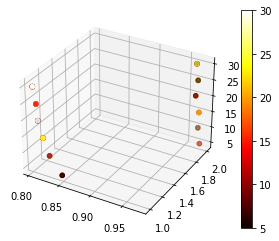

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = KNN_hyperparameters_tuned.mean_test_score
y = KNN_hyperparameters_tuned.p
z = KNN_hyperparameters_tuned.n_neighbors
c = KNN_hyperparameters_tuned.leaf_size

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
plt.show()

# Adversarial Attacks

## Classifiers

In [39]:
models = {
    "Random Forest": {"model":0},
    "Gradient Boosting": {"model":0},
    "XGBoost": {"model":0},
    "MultinomialNB": {"model":0},
    "Logistic Regr.": {"model":0},
    "KNN": {"model":0},
    "Decision Tree": {"model":0},
    "SVM (Linear)": {"model":0},
    "SVM (RBF)": {"model":0}
}

filenames = ["Random_forest.pkl" , "Gradient_Boosting.pkl" , "XGBoost.pkl" , "MultinomialNB.pkl" , "Logistic_regression.pkl" ,
            "KNN.pkl" , "Decision_tree.pkl" , "SVM_linear.pkl" , "SVM_RBF.pkl"]
index = 0
for name, model in models.items():
    print(name) 
    with open(f"comparison/classifiers/{filenames[index]}", "rb") as open_file:
        model["model"] = pickle.load(open_file)
    index += 1

Random Forest
Gradient Boosting
XGBoost
MultinomialNB
Logistic Regr.
KNN
Decision Tree
SVM (Linear)
SVM (RBF)


In [40]:
pprint.pprint(models)

{'Decision Tree': {'model': DecisionTreeClassifier()},
 'Gradient Boosting': {'model': GradientBoostingClassifier()},
 'KNN': {'model': KNeighborsClassifier()},
 'Logistic Regr.': {'model': LogisticRegression()},
 'MultinomialNB': {'model': MultinomialNB(alpha=0.2)},
 'Random Forest': {'model': RandomForestClassifier()},
 'SVM (Linear)': {'model': LinearSVC()},
 'SVM (RBF)': {'model': SVC()},
 'XGBoost': {'model': XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              eval_metric='mlogloss', gamma=None, gpu_id=None,
              importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, su

In [41]:
with open(f"comparison/classifiers/train_test_tf_idf.pkl", "rb") as open_file:
    dataset_processed = pickle.load(open_file)

length  = len(dataset_processed)
type_ = type(dataset_processed)

print(f"length of the dictionery : {len(dataset_processed)}")
print(f"type of the dictionery : {type(dataset_processed)}")

assert length == 5
assert type_ == dict

X_train, X_test, y_train, y_test , tfidf = dataset_processed["X_train"] , dataset_processed["X_test"] , \
        dataset_processed["y_train"] , dataset_processed["y_test"] , dataset_processed["tf-idf"]

length of the dictionery : 5
type of the dictionery : <class 'dict'>


In [42]:
print(f"Training split input: {X_train.shape}")
print(f"Testing split input : {X_test.shape}")
print(f"Training split class: {y_train.shape}")
print(f"Testing split class : {y_test.shape}")

# Get feature names in the vector
# tfidf.get_feature_names()

X_train_vect = tfidf.fit_transform(X_train)
X_test_vect = tfidf.transform(X_test)

# Get feature names in the vector
#tfidf.get_feature_names()

X_train_vect.toarray()
print(f"Training data shape : {X_train_vect.shape}")
X_test_vect.toarray()
print(f"Testomg data shape : {X_test_vect.shape}")

Training split input: (4396,)
Testing split input : (1099,)
Training split class: (4396,)
Testing split class : (1099,)
Training data shape : (4396, 28165)
Testomg data shape : (1099, 28165)


In [43]:
print(f"Training split class type: {type(y_train)}")
print(f"Testing split class type : {type(y_test)}")

Training split class type: <class 'pandas.core.series.Series'>
Testing split class type : <class 'pandas.core.series.Series'>


# **Algorithm 1: Label Flip Algorithm.**


### 1. set a threshold of 10% 15% 20% 25% 
### 2. Make 4 train dataset with X% relabeled data both spam and ham
### 3. Train classifier with the train data
### 4. Evaluate the classifier with test data
### 5. Get performance metrics like , f1score , precision, recall, confusion matrix heatmap



```C
Parameters: 
threshold = [list of percentage], y_train, 
idx_all (randomly generated indexes for all threshold)
Results = {}

Input: training set T = xi,yi 

for i in threshold:
    indexes_for_threshold_i = idx_all[i]
    for j in indexes_for_threshold_i:
        y_train[j] ~= 1 #Bit flip
    
    model.fit(xi,y_train)
    test_accuracy = model.score(X_test, y_test)
    y_pred = model.predict(predict)
    Results["y_train"] = y_train
    Results["test_accuracy"] = test_accuracy
    Results["y_pred"] = y_pred
        

Output: Results
```

In [44]:
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

print(f"Training split input: {X_train.shape}")
print(f"Testing split input : {X_test.shape}")
print(f"Training split class: {y_train.shape}")
print(f"Testing split class : {y_test.shape}")

print(f"Training split class type: {type(y_train)}")
print(f"Testing split class type : {type(y_test)}")

y_train_np = np.asarray(y_train).astype("float32").copy()
y_test_np = np.asarray(y_test).astype("float32").copy()


print(f"Training split class: {y_train_np.shape}")
print(f"Testing split class : {y_test_np.shape}")
print(f"Training split class type: {type(y_train_np)}")
print(f"Testing split class type : {type(y_test_np)}")

Training split input: (4396,)
Testing split input : (1099,)
Training split class: (4396,)
Testing split class : (1099,)
Training split class type: <class 'pandas.core.series.Series'>
Testing split class type : <class 'pandas.core.series.Series'>
Training split class: (4396,)
Testing split class : (1099,)
Training split class type: <class 'numpy.ndarray'>
Testing split class type : <class 'numpy.ndarray'>


In [47]:
assert len(X_train) == len(y_train)
thresholds = [10, 12, 15, 17, 20]
train_length = len(X_train)
num = [round(train_length * i / 100) for i in thresholds]
print(f"Number of records being relabeled based on threshold (%) : {thresholds} is numbers : {num}")

Number of records being relabeled based on threshold (%) : [10, 12, 15, 17, 20] is numbers : [440, 528, 659, 747, 879]


In [48]:
np.random.seed(1)
y_train_relabeled = y_train_np.copy()

idx_all = []
for i in num:
    idx = np.random.randint(train_length, size = i)
    idx_all.append(idx)

assert len(idx_all[0]) == 440
assert len(idx_all[1]) == 528
assert len(idx_all[2]) == 659
assert len(idx_all[3]) == 747
assert len(idx_all[4]) == 879
assert len(idx_all) == len(thresholds)
# print(idx_all[1])

In [49]:
y_train_np

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [50]:
Poisoned_classifiers = {
    "10 %" : {"model" :XGBClassifier(eval_metric='mlogloss') , "train_data_label" : 0 , "y_pred" : 0 , "duration" : 0 , "accuracy" : 0 },
    "12 %" : {"model" :XGBClassifier(eval_metric='mlogloss') , "train_data_label" : 0 , "y_pred" : 0 , "duration" : 0 , "accuracy" : 0 },
    "15 %" : {"model" :XGBClassifier(eval_metric='mlogloss') , "train_data_label" : 0 , "y_pred" : 0 , "duration" : 0 , "accuracy" : 0 },
    "17 %" : {"model" :XGBClassifier(eval_metric='mlogloss') , "train_data_label" : 0 , "y_pred" : 0 , "duration" : 0 , "accuracy" : 0 },
    "20 %" : {"model" :XGBClassifier(eval_metric='mlogloss') , "train_data_label" : 0 , "y_pred" : 0 , "duration" : 0 , "accuracy" : 0 },
    
}

for i, v in enumerate(Poisoned_classifiers):
    list_of_index = idx_all[i]
    start = perf_counter()
    for j in list_of_index:
        if y_train_relabeled[j] == 1.0:
            y_train_relabeled[j] = 0.0
        else :
            y_train_relabeled[j] = 1.0
    
    Poisoned_classifiers[v]["model"].fit(X_train_vect, y_train_relabeled)
    test_accuracy = Poisoned_classifiers[v]["model"].score(X_test_vect, y_test_np)
    y_pred = Poisoned_classifiers[v]["model"].predict(X_test_vect)
    duration = perf_counter() - start
    duration = round(duration,2)
    Poisoned_classifiers[v]["train_data_label"] = y_train_relabeled
    Poisoned_classifiers[v]["y_pred"] = y_pred
    Poisoned_classifiers[v]["duration"] = duration
    Poisoned_classifiers[v]["accuracy"] = test_accuracy

    
model_information = []

for percent,model in Poisoned_classifiers.items():
    model_information.append([percent, model["accuracy"], model["duration"]])
    
info = pd.DataFrame(model_information)
info.columns = ["Threshold" , "Accuracy", "Duration"]
info.sort_values(by = 'Accuracy', ascending = False, inplace=True)
info.reset_index(drop = True, inplace=True)
info.to_csv("comparison/Label_flip_Adversarial.csv")
info

,Threshold,Accuracy,Duration
0,10 %,0.961783,10.94
1,12 %,0.940855,11.67
2,15 %,0.873521,15.30
3,17 %,0.829845,10.53
4,20 %,0.725205,12.07


# Actual accuracy : 98.99 %

In [51]:
assert np.array_equal(y_train_np, y_train_relabeled)

AssertionError: 

# Algorithm 2 : 

## 1. Augment emails with synonyms in a certain number of records indexed randomly and derived from a threshold

```python
Parameters: threshold, index_all_thresholds, get_syn(), X_train

Input: Dataset D = (xi,yi) , Results = {}

for i in threshold:
    index_threshold_i = index_all_thresholds[i]
    
    for j in index_threshold_i:
        text = X_train[j]
        text = text.split()
        new_text = []
        for k in text:
            syn = get_synonyms(k)
            word = pick_syn(k,syn)
            new_text.append(word)
        new_text = " ".join(w for w in new_text)
        X_train[j] = new_text
        
    model.fit(X_train,y_train)
    test_accuracy = model.score(X_test, y_test)
    y_pred = model.predict(predict)
    Results["X_train"] = X_train
    Results["test_accuracy"] = test_accuracy
    Results["y_pred"] = y_pred

Output: Results;

```

In [57]:
emails = pd.read_csv("Augmented_emails.csv")
emails.head()

,X,spam
0,naturally irresistible corporate identity real...,1
1,stock trading gunslinger fanny merrill muzo co...,1
2,unbelievable home made easy wanting show homeo...,1
3,color printing special request additional info...,1
4,money software software compatibility great gr...,1


In [107]:
Only_Spam = emails.loc[emails["spam"] != 0]
# X_list, X_flattened, Total_num_of_all_words, Total_num_all_distinct_words, Most_Common_Spam_Words = Get_Flattened_list(Only_Spam, num=0)
word_list = Only_Spam['X'].str.cat().split(" ")
common_words_freq = Counter(word_list).most_common()

# Using map for 0 index
common_spam_words = list(map(lambda x: x[0], common_words_freq))
# common_words = pd.Series(' '.join(Only_Spam['X']).str.split()).value_counts()
print(f"Total number of Spam words : {len(common_spam_words)}")
print(f"Top 5 Spam words : {common_spam_words[:5]}")

Total number of Spam words : 16310
Top 5 Spam words : ['company', 'business', 'email', 'information', 'money']


In [176]:
Only_Ham = emails.loc[emails["spam"] != 1]
# X_list, X_flattened, Total_num_of_all_words, Total_num_all_distinct_words, Most_Common_Spam_Words = Get_Flattened_list(Only_Spam, num=0)
word_list = Only_Ham['X'].str.cat().split(" ")
common_words_freq = Counter(word_list).most_common()

# Using map for 0 index
common_ham_words = list(map(lambda x: x[0], common_words_freq))
# common_words = pd.Series(' '.join(Only_Spam['X']).str.split()).value_counts()
print(f"Total number of ham words : {len(common_ham_words)}")
print(f"Top 5 ham words : {common_ham_words[:5]}")

Total number of ham words : 26072
Top 5 ham words : ['enron', 'vince', '2000', 'kaminski', 'please']


In [118]:
def get_synonyms(word):
    syn = list()
    ant = list()
    for synset in wordnet.synsets(word):
        for lemma in synset.lemmas():
            syn.append(lemma.name())    #add the synonyms
            if lemma.antonyms():    #When antonyms are available, add them into the list
                ant.append(lemma.antonyms()[0].name())
#     print('Synonyms: ' + str(syn))
#     print('Antonyms: ' + str(ant))
    return syn

words = common_ham_words[:5] + common_spam_words[:5]

for i in words:
    syn = get_synonyms(i)
    print(f"The synonyms of the word \"{i}\" : \n{syn}\n")


The synonyms of the word "enron" : 
[]

The synonyms of the word "vince" : 
[]

The synonyms of the word "2000" : 
[]

The synonyms of the word "kaminski" : 
[]

The synonyms of the word "please" : 
['please', 'delight', 'please', 'please', 'please']

The synonyms of the word "company" : 
['company', 'company', 'company', 'companionship', 'fellowship', 'society', 'company', 'troupe', 'caller', 'company', 'company', 'party', 'company', "ship's_company", 'company', 'company', 'company', 'companion', 'accompany', 'keep_company']

The synonyms of the word "business" : 
['business', 'concern', 'business_concern', 'business_organization', 'business_organisation', 'commercial_enterprise', 'business_enterprise', 'business', 'occupation', 'business', 'job', 'line_of_work', 'line', 'business', 'business', 'business', 'business', 'business_sector', 'clientele', 'patronage', 'business', 'business', 'stage_business', 'byplay']

The synonyms of the word "email" : 
['electronic_mail', 'e-mail', 'emai

In [163]:
def pick_syn(word, syn):
    #print(type(word))
    
    if (len(syn) == 0):
        return word
    for i in syn:
        #print(type(syn[0]))
        if(i != word):
            return i
        else:
            continue
    return word
        
"""
Test
"""
syn = pick_syn("enron", get_synonyms("enron"))
print(syn)

syn = pick_syn("company", get_synonyms("company"))
print(syn)

syn = pick_syn("please", get_synonyms("please"))
print(syn)


syn = pick_syn("money", get_synonyms("money"))
print(syn)

a = ['g', 'g', 'g']
w = 'g'
syn = pick_syn(w,a)
print(syn)


w = "please" 
s = get_synonyms("please")
# print(s)
# print(type(w))
# print(type(s[0]))
assert w == s[0]

enron
companionship
delight
money
g


In [119]:
thresholds_syn_replacement = [10, 15, 20, 25, 30]
train_length = len(X_train)
num_records = [round(train_length * i / 100) for i in thresholds_syn_replacement]
print(f"Number of records being relabeled based on threshold (%) : {thresholds_syn_replacement} is numbers : {num_records}")

Number of records being relabeled based on threshold (%) : [10, 15, 20, 25, 30] is numbers : [440, 659, 879, 1099, 1319]


In [120]:
np.random.seed(1)

idx_all_rand = []
for i in num_records:
    idx = np.random.randint(train_length, size = i)
    idx_all_rand.append(idx)

assert len(idx_all_rand[0]) == 440
assert len(idx_all_rand[1]) == 659
assert len(idx_all_rand[2]) == 879
assert len(idx_all_rand[3]) == 1099
assert len(idx_all_rand[4]) == 1319
assert len(idx_all_rand) == len(thresholds_syn_replacement)

In [168]:
Poisoned_classifiers = {
    "10 %" : {"model" :XGBClassifier(eval_metric='mlogloss') , "train_data" : 0 , "y_pred" : 0 , "duration" : 0 , "accuracy" : 0 },
    "15 %" : {"model" :XGBClassifier(eval_metric='mlogloss') , "train_data" : 0 , "y_pred" : 0 , "duration" : 0 , "accuracy" : 0 },
    "20 %" : {"model" :XGBClassifier(eval_metric='mlogloss') , "train_data" : 0 , "y_pred" : 0 , "duration" : 0 , "accuracy" : 0 },
    "25 %" : {"model" :XGBClassifier(eval_metric='mlogloss') , "train_data" : 0 , "y_pred" : 0 , "duration" : 0 , "accuracy" : 0 },
    "30 %" : {"model" :XGBClassifier(eval_metric='mlogloss') , "train_data" : 0 , "y_pred" : 0 , "duration" : 0 , "accuracy" : 0 },
    
}

X_tr = X_train.copy()

for i, v in enumerate(Poisoned_classifiers):
    list_of_index = idx_all_rand[i]
    start = perf_counter()
    for j in list_of_index:
        text = X_tr[j]
        text = text.split()
        new_text = []
        for k in text:
            syn = get_synonyms(k)
            word = pick_syn(k,syn)
            new_text.append(word)
        new_text = " ".join([w for w in new_text])
        X_tr[j] = new_text
            
    tf_idf_vectorizer = TfidfVectorizer()
    X_train_vect = tf_idf_vectorizer.fit_transform(X_tr)
    X_test_vect  = tf_idf_vectorizer.transform(X_test)
    X_train_vect.toarray()
    X_test_vect.toarray()
    
    print(f"\n******** Reporting iteration {i} ********")
    print(f"Training split input: {X_tr.shape}")
    print(f"Testing split input : {X_test.shape}")
    print(f"Training split class: {y_train_np.shape}")
    print(f"Testing split class : {y_test_np.shape}")
    
    print(f"Training data shape : {X_train_vect.shape}")
    print(f"Testing data shape : {X_test_vect.shape}")
    
    print(f"Training split class type: {type(y_train_np)}")
    print(f"Testing split class type : {type(y_test_np)}\n")
    
    
    Poisoned_classifiers[v]["model"].fit(X_train_vect, y_train_np)
    test_accuracy = Poisoned_classifiers[v]["model"].score(X_test_vect, y_test_np)
    y_pred = Poisoned_classifiers[v]["model"].predict(X_test_vect)
    duration = perf_counter() - start
    duration = round(duration,2)
    Poisoned_classifiers[v]["train_data"] = X_tr
    Poisoned_classifiers[v]["y_pred"] = y_pred
    Poisoned_classifiers[v]["duration"] = duration
    Poisoned_classifiers[v]["accuracy"] = test_accuracy

    
model_information = []

for percent,model in Poisoned_classifiers.items():
    model_information.append([percent, model["accuracy"], model["duration"]])
    
info = pd.DataFrame(model_information)
info.columns = ["Threshold" , "Accuracy", "Duration"]
info.sort_values(by = 'Accuracy', ascending = False, inplace=True)
info.reset_index(drop = True, inplace=True)
info.to_csv("comparison/Synonym_Adversarial.csv")
info


******** Reporting iteration 0 ********
Training split input: (4396,)
Testing split input : (1099,)
Training split class: (4396,)
Testing split class : (1099,)
Training data shape : (4396, 29646)
Testing data shape : (1099, 29646)
Training split class type: <class 'numpy.ndarray'>
Testing split class type : <class 'numpy.ndarray'>


******** Reporting iteration 1 ********
Training split input: (4396,)
Testing split input : (1099,)
Training split class: (4396,)
Testing split class : (1099,)
Training data shape : (4396, 30135)
Testing data shape : (1099, 30135)
Training split class type: <class 'numpy.ndarray'>
Testing split class type : <class 'numpy.ndarray'>


******** Reporting iteration 2 ********
Training split input: (4396,)
Testing split input : (1099,)
Training split class: (4396,)
Testing split class : (1099,)
Training data shape : (4396, 30414)
Testing data shape : (1099, 30414)
Training split class type: <class 'numpy.ndarray'>
Testing split class type : <class 'numpy.ndarra

,Threshold,Accuracy,Duration
0,10 %,0.987261,9.45
1,25 %,0.984531,13.37
2,15 %,0.983621,10.27
3,20 %,0.981802,12.15
4,30 %,0.980892,13.41


# Actual accuracy : 98.99 %

## 2. Augment emails with Ham or Spam words in a certain number of records indexed randomly and derived from a threshold / HAM or SPAM word Injection

```python
Parameters: 
threshold, index_all_thresholds, ham_words, spam_words, X_train


Input: Dataset D = (xi,yi) , Results = {}

for i in threshold:
    index_threshold_i = index_all_thresholds[i]
    
    for j in index_threshold_i:
        
        if (y_train[j] == 1): #Spam
            text = X_train[j]
            text = text.split()
            Number_of_words_to_add = random.randint(Mean_Length_of_Email, 10)
            for k in Number_of_words_to_add:
                text.append(ham_words[k])
            text = " ".join([w for w in text])
            X_train[j] = new_text
        else : #Ham
            
            text = X_train[j]
            text = text.split()
            Number_of_words_to_add = random.randint(Mean_Length_of_Email, 10)
            for k in Number_of_words_to_add:
                text.append(ham_words[k])
            text = " ".join([w for w in text])
            X_train[j] = new_text
        
    model.fit(X_train,y_train)
    test_accuracy = model.score(X_test, y_test)
    y_pred = model.predict(predict)
    Results["X_train"] = X_train
    Results["test_accuracy"] = test_accuracy
    Results["y_pred"] = y_pred

Output: Results;

```

In [181]:
thresholds_spam_ham_replacement = [20, 25, 30, 35, 40]
train_length = len(X_train)
num_records = [round(train_length * i / 100) for i in thresholds_spam_ham_replacement]
print(f"Number of records being relabeled based on threshold (%) : {thresholds_spam_ham_replacement} is numbers : {num_records}")

Number of records being relabeled based on threshold (%) : [20, 25, 30, 35, 40] is numbers : [879, 1099, 1319, 1539, 1758]


In [182]:
np.random.seed(1)

idx_all_rand = []
for i in num_records:
    idx = np.random.randint(train_length, size = i)
    idx_all_rand.append(idx)

assert len(idx_all_rand[0]) == 879
assert len(idx_all_rand[1]) == 1099
assert len(idx_all_rand[2]) == 1319
assert len(idx_all_rand[3]) == 1539
assert len(idx_all_rand[4]) == 1758
assert len(idx_all_rand) == len(thresholds_syn_replacement)

In [204]:
from random import randrange, sample

def random_insert(lst, item):
    lst.insert(randrange(len(lst)+1), item)
    
Poisoned_classifiers = {
    "20 %" : {"model" :XGBClassifier(eval_metric='mlogloss') , "train_data" : 0 , "y_pred" : 0 , "duration" : 0 , "accuracy" : 0 },
    "25 %" : {"model" :XGBClassifier(eval_metric='mlogloss') , "train_data" : 0 , "y_pred" : 0 , "duration" : 0 , "accuracy" : 0 },
    "30 %" : {"model" :XGBClassifier(eval_metric='mlogloss') , "train_data" : 0 , "y_pred" : 0 , "duration" : 0 , "accuracy" : 0 },
    "35 %" : {"model" :XGBClassifier(eval_metric='mlogloss') , "train_data" : 0 , "y_pred" : 0 , "duration" : 0 , "accuracy" : 0 },
    "40 %" : {"model" :XGBClassifier(eval_metric='mlogloss') , "train_data" : 0 , "y_pred" : 0 , "duration" : 0 , "accuracy" : 0 },
    
}

X_tr = X_train.copy()
Mean_Length_of_Email = 400

for i, v in enumerate(Poisoned_classifiers):
    list_of_index = idx_all_rand[i]
    start = perf_counter()
    for j in list_of_index:
        
        if (y_train_np[j] == 1): #Spam
            text = X_tr[j]
            text = text.split()
            num = len(text) - Mean_Length_of_Email
            if num < 700 and num > 200:
                Number_of_words_to_add = np.random.randint(0, len(common_ham_words[:100]), Mean_Length_of_Email)
                for k in Number_of_words_to_add:
                    #text.append(common_ham_words[k])
                    text.insert(randrange(len(text)+1), common_ham_words[k])
            if num < 200:
                Number_of_words_to_add = np.random.randint(0, len(common_ham_words[:100]), Mean_Length_of_Email*2)
                for k in Number_of_words_to_add:
                    #text.append(common_ham_words[k])
                    text.insert(randrange(len(text)+1), common_ham_words[k])
            if num > 700:
                Number_of_words_to_add = np.random.randint(0, len(common_ham_words[:100]), Mean_Length_of_Email)
                for k in Number_of_words_to_add:
                    #text.append(common_ham_words[k])
                    text.insert(randrange(len(text)+1), common_ham_words[k])
            text = " ".join([w for w in text])
            X_tr[j] = text
        else : #Ham

            text = X_tr[j]
            text = text.split()
            num = len(text) - Mean_Length_of_Email
            if num < 700 and num > 200:
                Number_of_words_to_add = np.random.randint(0, len(common_spam_words[:100]), Mean_Length_of_Email)
                for k in Number_of_words_to_add:
                    #text.append(common_spam_words[k])
                    text.insert(randrange(len(text)+1), common_spam_words[k])
            if num < 200:
                Number_of_words_to_add = np.random.randint(low=0, high=len(common_spam_words[:100]), size=Mean_Length_of_Email*2)
                for k in Number_of_words_to_add:
                    #text.append(common_spam_words[k])
                    text.insert(randrange(len(text)+1), common_spam_words[k])
            if num > 700:
                Number_of_words_to_add = np.random.randint(0, len(common_spam_words[:100]), 100)
                for k in Number_of_words_to_add:
                    #text.append(common_spam_words[k])
                    text.insert(randrange(len(text)+1), common_spam_words[k])
            text = " ".join([w for w in text])
            X_tr[j] = text
            
    tf_idf_vectorizer = TfidfVectorizer()
    X_train_vect = tf_idf_vectorizer.fit_transform(X_tr)
    X_test_vect  = tf_idf_vectorizer.transform(X_test)
    X_train_vect.toarray()
    X_test_vect.toarray()
    
    print(f"\n******** Reporting iteration {i} ********")
    print(f"Training split input: {X_tr.shape}")
    print(f"Testing split input : {X_test.shape}")
    print(f"Training split class: {y_train_np.shape}")
    print(f"Testing split class : {y_test_np.shape}")
    
    print(f"Training data shape : {X_train_vect.shape}")
    print(f"Testing data shape : {X_test_vect.shape}")
    
    print(f"Training split class type: {type(y_train_np)}")
    print(f"Testing split class type : {type(y_test_np)}\n")
    
    
    Poisoned_classifiers[v]["model"].fit(X_train_vect, y_train_np)
    test_accuracy = Poisoned_classifiers[v]["model"].score(X_test_vect, y_test_np)
    y_pred = Poisoned_classifiers[v]["model"].predict(X_test_vect)
    duration = perf_counter() - start
    duration = round(duration,2)
    Poisoned_classifiers[v]["train_data"] = X_tr
    Poisoned_classifiers[v]["y_pred"] = y_pred
    Poisoned_classifiers[v]["duration"] = duration
    Poisoned_classifiers[v]["accuracy"] = test_accuracy

    
model_information = []

for percent,model in Poisoned_classifiers.items():
    model_information.append([percent, model["accuracy"], model["duration"]])
    
info = pd.DataFrame(model_information)
info.columns = ["Threshold" , "Accuracy", "Duration"]
info.sort_values(by = 'Accuracy', ascending = False, inplace=True)
info.reset_index(drop = True, inplace=True)
info.to_csv("comparison/Spam_Ham_Injection_random_Adversarial.csv")
info


******** Reporting iteration 0 ********
Training split input: (4396,)
Testing split input : (1099,)
Training split class: (4396,)
Testing split class : (1099,)
Training data shape : (4396, 28165)
Testing data shape : (1099, 28165)
Training split class type: <class 'numpy.ndarray'>
Testing split class type : <class 'numpy.ndarray'>


******** Reporting iteration 1 ********
Training split input: (4396,)
Testing split input : (1099,)
Training split class: (4396,)
Testing split class : (1099,)
Training data shape : (4396, 28165)
Testing data shape : (1099, 28165)
Training split class type: <class 'numpy.ndarray'>
Testing split class type : <class 'numpy.ndarray'>


******** Reporting iteration 2 ********
Training split input: (4396,)
Testing split input : (1099,)
Training split class: (4396,)
Testing split class : (1099,)
Training data shape : (4396, 28165)
Testing data shape : (1099, 28165)
Training split class type: <class 'numpy.ndarray'>
Testing split class type : <class 'numpy.ndarra

,Threshold,Accuracy,Duration
0,20 %,0.975432,9.58
1,25 %,0.971793,11.72
2,35 %,0.964513,14.62
3,30 %,0.963603,14.10
4,40 %,0.955414,20.29


In [203]:
# sentence_tokenized = emails['X'].str.split()
# sentence_tokenized.head()
#remove duplicated data
print(f"duplicated entries {emails.duplicated().sum()}")
emails = emails.drop_duplicates()
print(f"duplicated entries {emails.duplicated().sum()}")

#remove Null values
print("Number of null features in the dataset :")
print(f"{emails.isnull().sum()}")

print()
emails.dropna(subset=["X"], inplace=True)

print("Number of null features in the dataset :")
print(f"{emails.isnull().sum()}")

def get_length(text):
    lst = text.split()
    return len(lst)

emails["lengths"] = emails["X"].apply(lambda x: get_length(x))
emails.lengths.describe()
# sentence_tokenized.str.len().describe()

duplicated entries 0
duplicated entries 0
Number of null features in the dataset :
X          0
spam       0
lengths    0
dtype: int64

Number of null features in the dataset :
X          0
spam       0
lengths    0
dtype: int64


count    5493.000000
mean      116.489168
std       148.466442
min         2.000000
25%        39.000000
50%        73.000000
75%       138.000000
max      2469.000000
Name: lengths, dtype: float64

In [208]:
def Adversarial_algorithm(num):   
    Poisoned_classifiers = {
        "20 %" : {"model" :XGBClassifier(eval_metric='mlogloss') , "train_data" : 0 , "y_pred" : 0 , "duration" : 0 , "accuracy" : 0 },
        "25 %" : {"model" :XGBClassifier(eval_metric='mlogloss') , "train_data" : 0 , "y_pred" : 0 , "duration" : 0 , "accuracy" : 0 },
        "30 %" : {"model" :XGBClassifier(eval_metric='mlogloss') , "train_data" : 0 , "y_pred" : 0 , "duration" : 0 , "accuracy" : 0 },
        "35 %" : {"model" :XGBClassifier(eval_metric='mlogloss') , "train_data" : 0 , "y_pred" : 0 , "duration" : 0 , "accuracy" : 0 },
        "40 %" : {"model" :XGBClassifier(eval_metric='mlogloss') , "train_data" : 0 , "y_pred" : 0 , "duration" : 0 , "accuracy" : 0 },

    }

    X_tr = X_train.copy()
    #Length_of_Email = [50, 100, 200, 300, 400]
    new_entries = []

    for i, v in enumerate(Poisoned_classifiers):
        list_of_index = idx_all_rand[i]
        start = perf_counter()
        for j in list_of_index:

            if (y_train_np[j] == 1): #Spam
                text = X_tr[j]
                text = text.split()
                Number_of_words_to_add = np.random.randint(0, len(common_ham_words), num)
                for k in Number_of_words_to_add:
                    #text.append(common_ham_words[k])
                    text.insert(randrange(len(text)+1), common_ham_words[k])             

                new_text = " ".join([w for w in text])
                X_tr[j] = new_text
            else : #Ham

                text = X_tr[j]
                text = text.split()
                Number_of_words_to_add = np.random.randint(0, len(common_spam_words), num)
                for k in Number_of_words_to_add:
                    #text.append(common_ham_words[k])
                    text.insert(randrange(len(text)+1), common_spam_words[k])

                new_text = " ".join([w for w in text])
                X_tr[j] = new_text

        tf_idf_vectorizer = TfidfVectorizer()
        X_train_vect = tf_idf_vectorizer.fit_transform(X_tr)
        X_test_vect  = tf_idf_vectorizer.transform(X_test)
        X_train_vect.toarray()
        X_test_vect.toarray()

        print(f"\n******** Reporting iteration {i} ********")
        print(f"Training split input: {X_tr.shape}")
        print(f"Testing split input : {X_test.shape}")
        print(f"Training split class: {y_train_np.shape}")
        print(f"Testing split class : {y_test_np.shape}")

        print(f"Training data shape : {X_train_vect.shape}")
        print(f"Testing data shape : {X_test_vect.shape}")

        print(f"Training split class type: {type(y_train_np)}")
        print(f"Testing split class type : {type(y_test_np)}\n")


        Poisoned_classifiers[v]["model"].fit(X_train_vect, y_train_np)
        test_accuracy = Poisoned_classifiers[v]["model"].score(X_test_vect, y_test_np)
        y_pred = Poisoned_classifiers[v]["model"].predict(X_test_vect)
        duration = perf_counter() - start
        duration = round(duration,2)
        Poisoned_classifiers[v]["train_data"] = X_tr
        Poisoned_classifiers[v]["y_pred"] = y_pred
        Poisoned_classifiers[v]["duration"] = duration
        Poisoned_classifiers[v]["accuracy"] = test_accuracy


    model_information = []

    for percent,model in Poisoned_classifiers.items():
        model_information.append([percent, model["accuracy"], model["duration"], num])

    info = pd.DataFrame(model_information)
    info.columns = ["Threshold" , "Accuracy", "Duration", "Number of Words Added"]
    info.sort_values(by = 'Accuracy', ascending = False, inplace=True)
    info.reset_index(drop = True, inplace=True)
    return Poisoned_classifiers, info

num_words_per_record = [100,200,300,400,500]
Classifiers = {}

for i in num_words_per_record:
    Poisoned_classifiers, info = Adversarial_algorithm(i)
    Classifiers[f"{i}"] = {f"Poisoned_classifiers" : Poisoned_classifiers, "info" : info}

# Merge = [
#     Classifiers["100"]["info"],
#     Classifiers["200"]["info"],
#     Classifiers["300"]["info"],
#     Classifiers["400"]["info"],
#     Classifiers["500"]["info"]
# ]
merge = []

for i,v in enumerate(Classifiers):
    
    merge.append(Classifiers[v]["info"])
    
merge  


******** Reporting iteration 0 ********
Training split input: (4396,)
Testing split input : (1099,)
Training split class: (4396,)
Testing split class : (1099,)
Training data shape : (4396, 34038)
Testing data shape : (1099, 34038)
Training split class type: <class 'numpy.ndarray'>
Testing split class type : <class 'numpy.ndarray'>


******** Reporting iteration 1 ********
Training split input: (4396,)
Testing split input : (1099,)
Training split class: (4396,)
Testing split class : (1099,)
Training data shape : (4396, 35619)
Testing data shape : (1099, 35619)
Training split class type: <class 'numpy.ndarray'>
Testing split class type : <class 'numpy.ndarray'>


******** Reporting iteration 2 ********
Training split input: (4396,)
Testing split input : (1099,)
Training split class: (4396,)
Testing split class : (1099,)
Training data shape : (4396, 36233)
Testing data shape : (1099, 36233)
Training split class type: <class 'numpy.ndarray'>
Testing split class type : <class 'numpy.ndarra

[  Threshold  Accuracy  Duration  Number of Words Added
 0      25 %  0.987261     15.02                    100
 1      30 %  0.986351     12.35                    100
 2      20 %  0.985441     15.56                    100
 3      35 %  0.985441     17.73                    100
 4      40 %  0.982712     24.62                    100,
   Threshold  Accuracy  Duration  Number of Words Added
 0      20 %  0.985441     13.89                    200
 1      30 %  0.984531     28.05                    200
 2      25 %  0.983621     18.07                    200
 3      35 %  0.982712     33.51                    200
 4      40 %  0.971793     41.35                    200,
   Threshold  Accuracy  Duration  Number of Words Added
 0      25 %  0.983621     24.57                    300
 1      20 %  0.982712     16.88                    300
 2      30 %  0.982712     32.64                    300
 3      35 %  0.979072     44.83                    300
 4      40 %  0.974522     66.23              

In [210]:
Merged = pd.concat(merge)
Merged.sort_values(by = 'Accuracy', ascending = False, inplace=True)
Merged.reset_index(drop = True, inplace=True)
Merged.to_csv("comparison/Spam_Ham_Injection_Adversarial.csv")
Merged

,Threshold,Accuracy,Duration,Number of Words Added
0,25 %,0.987261,15.02,100
1,20 %,0.987261,21.28,400
2,30 %,0.986351,12.35,100
3,20 %,0.985441,15.56,100
4,35 %,0.985441,17.73,100
5,20 %,0.985441,13.89,200
6,30 %,0.984531,28.05,200
7,20 %,0.984531,32.06,500
8,25 %,0.983621,18.07,200
9,25 %,0.983621,24.57,300


# Algorithm 3: Addition of New Poisoned Entries Algorithm.

```C
Parameters: threshold, Ham_words, i=1, newEntries = [], Spam_words
Number_of_words_to_add = random.randint(Mean_Length_of_Email, 10)

Input: Dataset D = (xi,yi) , i = [10% of all training data, 15%, 20%, 25%, 30%];

for i in threshold:
    Number_of_records_to_add = round(len(xi) * i / 100)
    new_entry = []
    for j in Number_of_records_to_add:
    
        for k in Number_of_words_to_add:
            word_index = random.randint(len(Ham_words), k)
            
            new_email = []
            
            for l in word_index:
                new_email.append(l)
            new_entry.append(new_email)
    newEntries.append(new_entry)

Output: newEntries;

```

In [167]:
No_of_spam = y_train.value_counts()[1]


1080

# **Algorithm 4: Defence Algorithm.**

```C

Parameters: k=5, malicious_samples = 0;

Input: training set T = xi,yi , 1 <= i <= m;

for ( i = 1; i <= m; i = i + 1 ) {
    
    Di = k-NN (Ti ,T)
    vote = label_voting (Di)
    confidence = vote_confidence (Di,vote)
    if confidence > 0.60 and vote != Ti then
        malicious_samples++
    end
        
}

Output: malicious_samples;

```